The following data is acquired from https://data.tpdc.ac.cn/en/data/0fbc30a8-6065-4be3-b98b-95ae7f15a69e/

Further details are provided in the excel sheet - Available_data - AWS_Yakou_ITP_Data_2019 (Sheet name)

The excel sheet contains the following parameters:

1. Wind speed at 10 m
2. Wind direction at 10 m
3. Air temperature at 5 m 
4. Relative humidity at 5 m 
5. Precipitation at 10 m
6. Air pressure 
7. Infrared temperature 
8. Incoming shortwave radiation
9. Outgoing shortwave radiation
10. Incoming longwave radiation
11. Outgoing longwave radiation
12. Net radiation
13. Soil heat flux at - 0.06 m
14. Soil moisture at - 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m
15. Soil temperature - 0.00 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m



In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec

In [2]:
sns.set()
###

### 1. Reading the data

In [3]:
pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',100)

### Extracting the AWS met data - 

In [4]:
df_AWS = pd.read_excel('AWS_Yakou_ITP_Data_2019.xlsx',index_col=0,parse_dates=True)  
df_AWS.head()

,WS_10m,WD_10m,Ta_5m,RH_5m,Rain,Press,IRT_1,IRT_2,PAR_down,PAR_up,DR,UR,DLR_Cor,ULR_Cor,Rn,Gs_1,Gs_2,Gs_3,Ms_4cm,Ms_10cm,Ms_20cm,Ms_40cm,Ms_80cm,Ms_120cm,Ms_160cm,Ts_0cm,Ts_4cm,Ts_10cm,Ts_20cm,Ts_40cm,Ts_80cm,Ts_120cm,Ts_160cm
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2.463,5.544,-13.78,30.58,0.0,610.4,-22.64,-22.32,0.0,0.0,0.0,0.0,160.8,225.0,-64.24,-6.052,-8.67,-19.42,6.440,7.569,8.11,8.62,5.182,3.385,4.470,-20.34,-16.31,-14.28,-13.64,-12.40,-10.17,-6.901,-5.313
2019-01-01 00:10:00,2.820,5.876,-13.84,30.77,0.0,610.3,-22.89,-22.63,0.0,0.0,0.0,0.0,159.5,223.7,-64.24,-6.252,-8.93,-19.73,6.433,7.569,8.11,8.61,5.181,3.384,4.473,-20.31,-16.36,-14.30,-13.65,-12.39,-10.18,-6.904,-5.315
2019-01-01 00:20:00,3.518,6.020,-13.75,30.44,0.0,610.3,-22.39,-22.18,0.0,0.0,0.0,0.0,160.3,224.5,-64.24,-6.465,-9.15,-19.97,6.433,7.569,8.11,8.62,5.189,3.384,4.473,-20.34,-16.40,-14.33,-13.65,-12.39,-10.18,-6.906,-5.315
2019-01-01 00:30:00,2.709,5.988,-14.29,31.84,0.0,610.3,-22.82,-22.51,0.0,0.0,0.0,0.0,159.3,223.5,-64.24,-6.682,-9.34,-20.15,6.428,7.561,8.11,8.61,5.185,3.383,4.474,-20.25,-16.45,-14.36,-13.66,-12.39,-10.18,-6.910,-5.315
2019-01-01 00:40:00,3.151,6.049,-14.12,31.48,0.0,610.2,-22.69,-22.44,0.0,0.0,0.0,0.0,159.0,223.3,-64.24,-6.884,-9.51,-20.30,6.426,7.561,8.11,8.61,5.185,3.381,4.469,-20.28,-16.49,-14.39,-13.67,-12.39,-10.18,-6.915,-5.316


### Extracting the details about the AWS met data - 

In [5]:
df_AWS_details = pd.read_excel('../Available_data.xlsx', sheet_name='AWS_Yakou_ITP_Data_2019_extract',index_col=0,parse_dates=True)  
df_AWS_details.head()

,Parameter,Product Name & Direction,Variable name,Depth/Height [m],Time steps [mins],Time interval,Units,Comments
Sl.No.,,,,,,,,
1,Wind speed at 10 m (m/s),"010C/020C; 10 m, north",WS_10m,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,m/s,NaN
2,Wind direction at 10 m (°),"010C/020C; 10 m, north",WD_10m,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,°,Why is the data all red?
3,Air temperature at 5 m (°C),"HMP45C; 5 m, north",Ta_5m,5.0,10,01.01.2019 00:00 - 31.12.2019 23:50,°C,NaN
4,Relative humidity at 5 m (%),"HMP45C; 5 m, north",RH_5m,5.0,10,01.01.2019 00:00 - 31.12.2019 23:50,%,Is it relative? Says RH - Hence should be rela...
5,Precipitation at 10 m (mm),rain gauge (TE525M; 10 m),Rain,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,mm,Precipitation measurement at 10 m? Seems odd


In [6]:
### Renaming the columns - 
data_AWS = df_AWS.copy()
data_AWS.columns = df_AWS_details['Parameter'].values

data_AWS.columns

Index(['Wind speed at 10 m (m/s)', 'Wind direction at 10 m (°)',
       'Air temperature at 5 m (°C)', 'Relative humidity at 5 m (%)',
       'Precipitation at 10 m (mm)', 'Air pressure (hPa)',
       'Infrared temperature (°C)', 'Infrared temperature (°C)', 'PAR_down',
       'PAR_up', 'Incoming shortwave radiation (W/m^2)',
       'Outgoing shortwave radiation (W/m^2)',
       'Incoming longwave radiation (W/m^2)',
       'Outgoing longwave radiation (W/m^2)', 'Net radiation (W/m^2)',
       'Soil heat flux at - 0.06 m (W/m^2) - 1',
       'Soil heat flux at - 0.06 m (W/m^2) - 2',
       'Soil heat flux at - 0.06 m (W/m^2) - 3',
       'Soil moisture at - 0.04 m (%)', 'Soil moisture at - 0.1 m (%)',
       'Soil moisture at - 0.2 m (%)', 'Soil moisture at - 0.4 m (%)',
       'Soil moisture at - 0.8 m (%)', 'Soil moisture at - 1.2 m (%)',
       'Soil moisture at - 1.6 m (%)', 'Soil temperature at - 0.00 m (°C)',
       'Soil temperature at - 0.04 m (°C)', 'Soil temperature at - 0.1 

### The data has -6999 values for missing data
- Therefore replacing -6999 with NaN vaues

In [7]:
data_AWS_syn = data_AWS.copy()
data_AWS_syn = data_AWS_syn.replace(-6999,None)

In [8]:
data_AWS_prep = data_AWS_syn.copy()

In [9]:
### Check for NaN values
data_AWS_syn.index[np.where(np.isnan(data_AWS_syn))[0]]

DatetimeIndex(['2019-01-22 07:30:00', '2019-01-30 17:30:00',
               '2019-01-30 21:00:00', '2019-01-31 00:40:00',
               '2019-01-31 02:00:00', '2019-02-10 08:10:00',
               '2019-02-10 08:20:00', '2019-02-10 08:30:00',
               '2019-02-10 09:10:00', '2019-02-14 20:40:00',
               ...
               '2019-12-01 04:10:00', '2019-12-05 13:20:00',
               '2019-12-09 05:10:00', '2019-12-09 09:30:00',
               '2019-12-09 13:10:00', '2019-12-09 13:20:00',
               '2019-12-09 22:20:00', '2019-12-09 22:40:00',
               '2019-12-25 11:40:00', '2019-12-25 11:40:00'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=3195, freq=None)

### Resampling the data to daily mean values 
* To observe the data on a seasonal scale

In [10]:
data_AWS_syn = data_AWS_syn.resample('D').mean()

In [11]:
data_AWS_syn.index[np.where(np.isnan(data_AWS_syn))[0]]

DatetimeIndex(['2019-10-09', '2019-10-09', '2019-10-10', '2019-10-10'], dtype='datetime64[ns]', name='TIMESTAMP', freq=None)

In [28]:
data_AWS_syn.describe()

,Wind speed at 10 m (m/s),Wind direction at 10 m (°),Air temperature at 5 m (°C),Relative humidity at 5 m (%),Precipitation at 10 m (mm),Air pressure (hPa),Infrared temperature (°C),Infrared temperature (°C),PAR_down,PAR_up,Incoming shortwave radiation (W/m^2),Outgoing shortwave radiation (W/m^2),Incoming longwave radiation (W/m^2),Outgoing longwave radiation (W/m^2),Net radiation (W/m^2),Soil heat flux at - 0.06 m (W/m^2) - 1,Soil heat flux at - 0.06 m (W/m^2) - 2,Soil heat flux at - 0.06 m (W/m^2) - 3,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C),Net_radiation_calc
count,363.000000,363.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,3.793086,103.386709,-5.066818,61.147501,0.009317,612.820908,-6.618270,-6.596620,40.276816,21.529339,189.000778,113.022665,234.581333,297.983998,27.244823,-0.192266,1.409059,1.718489,20.316221,20.989050,20.667845,19.853912,10.715384,6.084649,9.043305,-2.809744,-3.848635,-2.177458,-2.361972,-2.409304,-2.436660,-2.599541,-2.415277,12.575448
std,1.608026,89.268680,7.842448,21.875366,0.024737,4.907243,10.021091,9.616959,15.425481,17.436901,104.503467,74.392006,60.705999,50.533518,86.745861,8.804874,8.690349,11.045855,13.726282,13.310682,12.442369,10.979908,5.061749,2.766122,4.344773,7.859368,7.222117,7.175469,6.732519,6.092699,5.307776,4.066778,3.711848,118.609594
min,0.430521,2.684076,-22.371806,15.676708,0.000000,600.989583,-27.583819,-27.341597,11.686264,0.702556,-1.601000,13.028139,114.273611,201.541667,-193.412417,-17.760000,-16.814583,-21.002153,6.141292,7.216236,7.739764,8.208889,4.856646,3.040326,4.026632,-21.331042,-19.528889,-17.424167,-16.499097,-14.824167,-12.795000,-10.323125,-8.990833,-327.270000
25%,2.776576,14.320493,-12.443403,40.797569,0.000000,609.601389,-15.921597,-15.356639,27.704319,4.180243,113.537083,47.427625,182.120833,252.184028,-23.862368,-4.753632,-5.093979,-5.970917,7.477507,8.583472,9.022292,9.178056,5.360847,3.300313,4.282785,-9.155354,-10.597222,-9.071806,-8.823264,-7.668590,-7.965931,-7.170674,-6.515618,-20.428931
50%,3.617229,100.725694,-4.711500,61.827986,0.000000,613.641667,-7.554806,-7.375826,38.211819,19.067021,191.942292,100.305903,234.597917,288.897917,18.391528,-0.543840,-0.469708,-0.765424,12.205069,13.039722,13.117153,12.979375,10.231458,6.551625,11.223889,-0.990125,-1.912062,-0.327201,-0.686646,-0.900993,-0.415757,-0.371021,-0.231694,19.120486
75%,4.584049,180.069618,1.997556,79.889861,0.003472,616.610417,2.391153,1.763785,51.391056,35.487556,269.203535,166.403340,290.018750,345.732639,88.944278,3.777979,4.828528,5.798118,35.796528,35.922639,34.657500,32.205486,15.422500,7.671701,12.944861,2.934062,1.341965,2.874028,2.359229,2.194694,1.434910,-0.083000,0.150472,90.624708
max,10.684833,278.388194,9.971292,96.300694,0.206944,622.882639,12.451917,12.163410,74.383271,64.448521,416.853785,302.730625,352.248611,396.752083,239.133924,30.774931,38.554590,46.586292,41.229583,43.395417,41.037847,38.214028,24.998611,18.733264,29.776944,12.218778,9.319222,10.473257,8.987118,7.269653,5.133403,6.096389,2.489299,239.143278


### Plotting Wind speed at 10 m, Air temperature at 5 m, Relative humidity at 5 m, Precipitation at 10 m, Air pressure - Daily scale - For the year 2019

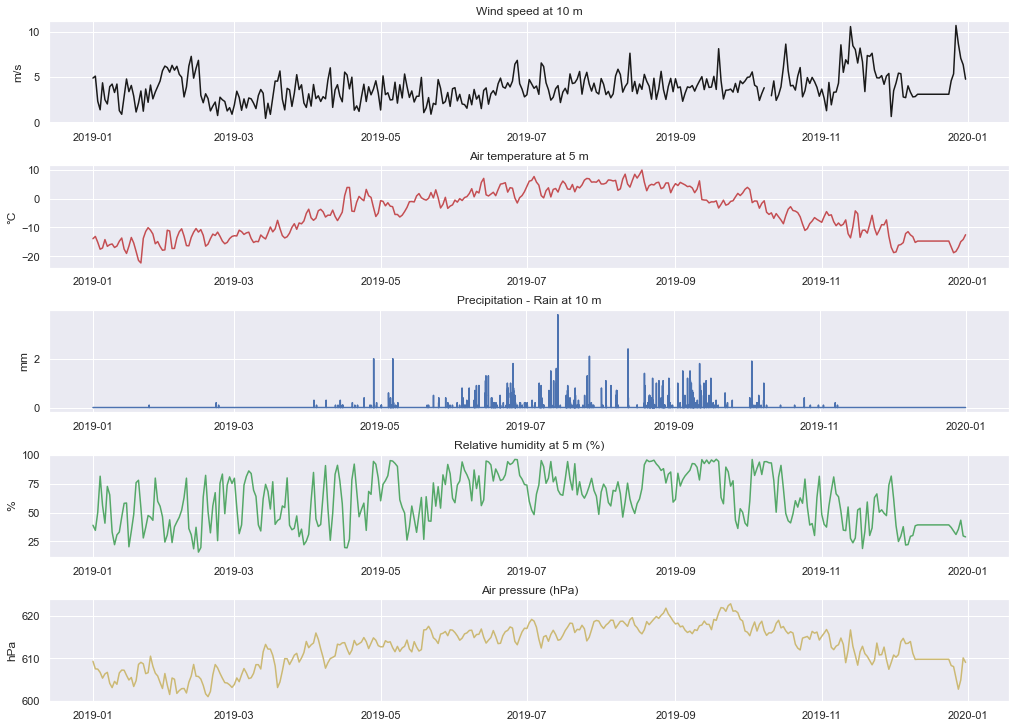

In [12]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_AWS_syn['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Air temperature at 5 m')
f2_ax2.plot(data_AWS_syn['Air temperature at 5 m (°C)'], 'r',label='Air temperature at 5 m (°C)')
f2_ax2.set_ylabel('°C')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('Precipitation - Rain at 10 m')
f2_ax3.plot(data_AWS_prep['Precipitation at 10 m (mm)'], 'b',label='Precipitation at 10 m (mm)')
f2_ax3.set_ylabel('mm')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_AWS_syn['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Air pressure (hPa)')
f2_ax5.plot(data_AWS_syn['Air pressure (hPa)'], 'y',label='Air pressure (hPa)')
f2_ax5.set_ylabel('hPa')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax5.grid(True)


### Plotting the erroneous data

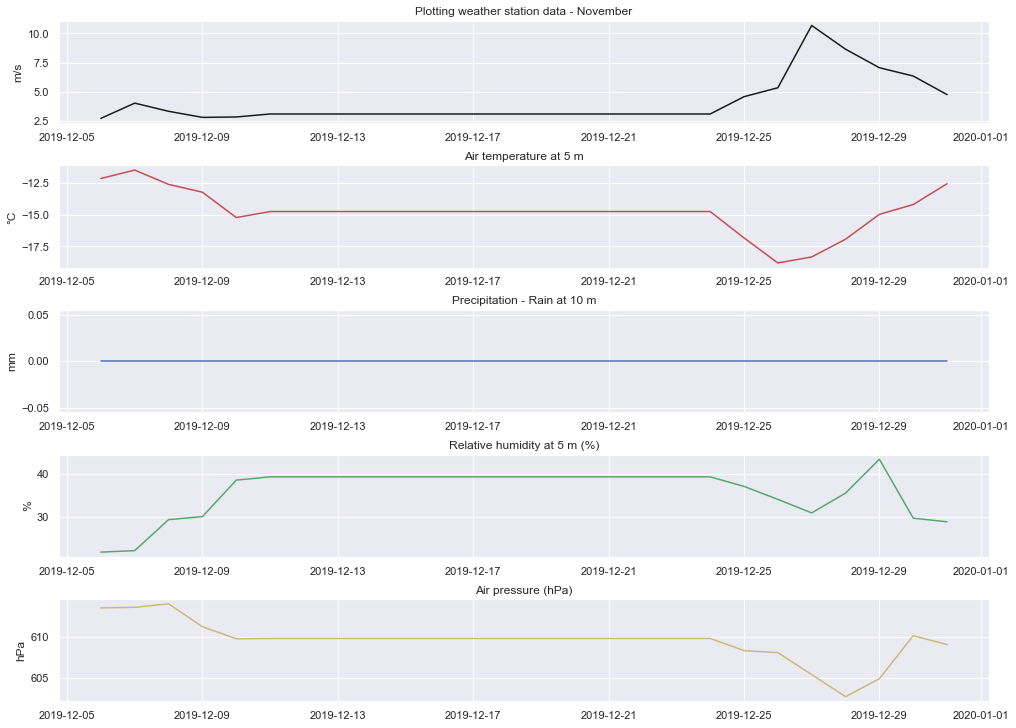

In [13]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])

data_AWS_syn_plot = data_AWS_syn['2019-12-06':]

f2_ax1.set_title('Plotting weather station data - November')
f2_ax1.plot(data_AWS_syn_plot['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Air temperature at 5 m')
f2_ax2.plot(data_AWS_syn_plot['Air temperature at 5 m (°C)'], 'r',label='Air temperature at 5 m (°C)')
f2_ax2.set_ylabel('°C')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('Precipitation - Rain at 10 m')
f2_ax3.plot(data_AWS_syn_plot['Precipitation at 10 m (mm)'], 'b',label='Precipitation at 10 m (mm)')
f2_ax3.set_ylabel('mm')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_AWS_syn_plot['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Air pressure (hPa)')
f2_ax5.plot(data_AWS_syn_plot['Air pressure (hPa)'], 'y',label='Air pressure (hPa)')
f2_ax5.set_ylabel('hPa')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax5.grid(True)

### Finding  erroneous data:
* Found a time period where all the parameters are static - not possible!

In [14]:
data_AWS_syn['2019-12-10':'2019-12-25']

,Wind speed at 10 m (m/s),Wind direction at 10 m (°),Air temperature at 5 m (°C),Relative humidity at 5 m (%),Precipitation at 10 m (mm),Air pressure (hPa),Infrared temperature (°C),Infrared temperature (°C),PAR_down,PAR_up,Incoming shortwave radiation (W/m^2),Outgoing shortwave radiation (W/m^2),Incoming longwave radiation (W/m^2),Outgoing longwave radiation (W/m^2),Net radiation (W/m^2),Soil heat flux at - 0.06 m (W/m^2) - 1,Soil heat flux at - 0.06 m (W/m^2) - 2,Soil heat flux at - 0.06 m (W/m^2) - 3,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-10,2.836722,224.922222,-15.226528,38.553889,0.0,609.759028,-21.289861,-19.852708,41.057757,30.984771,31.23,159.600403,145.679167,228.638889,-96.9,-17.091806,-9.496340,-10.153194,9.287153,10.306944,10.307014,11.077431,7.846340,6.465063,12.249931,-8.726194,-8.683194,-6.332854,-5.404097,-3.550403,-1.275583,-0.082597,0.047771
2019-12-11,3.093000,226.100000,-14.750000,39.310000,0.0,609.800000,-17.950000,-15.940000,68.850000,52.080000,31.23,265.500000,145.700000,238.700000,-96.9,-17.760000,-9.910000,-10.570000,9.260000,10.280000,10.280000,11.060000,7.822000,6.465000,12.250000,-8.870000,-8.810000,-6.431000,-5.465000,-3.575000,-1.300000,-0.083000,0.048000
2019-12-12,3.093000,226.100000,-14.750000,39.310000,0.0,609.800000,-17.950000,-15.940000,68.850000,52.080000,31.23,265.500000,145.700000,238.700000,-96.9,-17.760000,-9.910000,-10.570000,9.260000,10.280000,10.280000,11.060000,7.822000,6.465000,12.250000,-8.870000,-8.810000,-6.431000,-5.465000,-3.575000,-1.300000,-0.083000,0.048000
2019-12-13,3.093000,226.100000,-14.750000,39.310000,0.0,609.800000,-17.950000,-15.940000,68.850000,52.080000,31.23,265.500000,145.700000,238.700000,-96.9,-17.760000,-9.910000,-10.570000,9.260000,10.280000,10.280000,11.060000,7.822000,6.465000,12.250000,-8.870000,-8.810000,-6.431000,-5.465000,-3.575000,-1.300000,-0.083000,0.048000
2019-12-14,3.093000,226.100000,-14.750000,39.310000,0.0,609.800000,-17.950000,-15.940000,68.850000,52.080000,31.23,265.500000,145.700000,238.700000,-96.9,-17.760000,-9.910000,-10.570000,9.260000,10.280000,10.280000,11.060000,7.822000,6.465000,12.250000,-8.870000,-8.810000,-6.431000,-5.465000,-3.575000,-1.300000,-0.083000,0.048000
2019-12-15,3.093000,226.100000,-14.750000,39.310000,0.0,609.800000,-17.950000,-15.940000,68.850000,52.080000,31.23,265.500000,145.700000,238.700000,-96.9,-17.760000,-9.910000,-10.570000,9.260000,10.280000,10.280000,11.060000,7.822000,6.465000,12.250000,-8.870000,-8.810000,-6.431000,-5.465000,-3.575000,-1.300000,-0.083000,0.048000
2019-12-16,3.093000,226.100000,-14.750000,39.310000,0.0,609.800000,-17.950000,-15.940000,68.850000,52.080000,31.23,265.500000,145.700000,238.700000,-96.9,-17.760000,-9.910000,-10.570000,9.260000,10.280000,10.280000,11.060000,7.822000,6.465000,12.250000,-8.870000,-8.810000,-6.431000,-5.465000,-3.575000,-1.300000,-0.083000,0.048000
2019-12-17,3.093000,226.100000,-14.750000,39.310000,0.0,609.800000,-17.950000,-15.940000,68.850000,52.080000,31.23,265.500000,145.700000,238.700000,-96.9,-17.760000,-9.910000,-10.570000,9.260000,10.280000,10.280000,11.060000,7.822000,6.465000,12.250000,-8.870000,-8.810000,-6.431000,-5.465000,-3.575000,-1.300000,-0.083000,0.048000
2019-12-18,3.093000,226.100000,-14.750000,39.310000,0.0,609.800000,-17.950000,-15.940000,68.850000,52.080000,31.23,265.500000,145.700000,238.700000,-96.9,-17.760000,-9.910000,-10.570000,9.260000,10.280000,10.280000,11.060000,7.822000,6.465000,12.250000,-8.870000,-8.810000,-6.431000,-5.465000,-3.575000,-1.300000,-0.083000

##### The time period from '2019-12-12':'2019-12-24' - Should be disregarded since the same values cannot occur at continous time periods

In [15]:
data_AWS_syn[['Wind speed at 10 m (m/s)','Air temperature at 5 m (°C)','Precipitation at 10 m (mm)','Relative humidity at 5 m (%)','Air pressure (hPa)']].describe()

,Wind speed at 10 m (m/s),Air temperature at 5 m (°C),Precipitation at 10 m (mm),Relative humidity at 5 m (%),Air pressure (hPa)
count,363.000000,365.000000,365.000000,365.000000,365.000000
mean,3.793086,-5.066818,0.009317,61.147501,612.820908
std,1.608026,7.842448,0.024737,21.875366,4.907243
min,0.430521,-22.371806,0.000000,15.676708,600.989583
25%,2.776576,-12.443403,0.000000,40.797569,609.601389
50%,3.617229,-4.711500,0.000000,61.827986,613.641667
75%,4.584049,1.997556,0.003472,79.889861,616.610417
max,10.684833,9.971292,0.206944,96.300694,622.882639


Comments:
* The time period from '2019-12-12':'2019-12-24' - Should be disregarded since the same values cannot occur at continous time periods
1. Wind speed at 10 m [m/s]
    * Wind speeds vary from 0 : 10.68 m/s with a mean of 3.793 m/s - That seems possible!
    * There is considerable variation - seems plausible.
    * Any chances of seasonality affects? - Westerlies during the winter and Indian Summer Monsoon during the summer.
2. Air temperature at 5 m [°C]
    * Varies from -22.37°C : 9.97°C with a mean of -5°C. - Very cold region!
    * The air temperature increases during the summer and decreases during the winter - Good!
    * Seasonality effects are clearly seen - Good! - Can probably be modelled!
3. Precipitation at 10 m [mm]
    * Variations are quite low! - Varies from 0 : 0.2 mm with a mean of 0.009 mm 
    * The precipitation mainly occurs during the indian summer monsoon period - from June : October
    * There might be more snow than rain
4. Relative humidity at 5 m [%]
    * Varies from 15%: 96% with a mean of 61% - Quite humid most of the time.
    * During precipitation - you see the RH increases - That's good!
    * I was also expecting that the relative humidity decreases with increase in air temperature - Not the case!
5. Air pressure at hPa
    * Varies from 600 - 622 hPa - Important to note while conducting Piezometer experiments!
    * Is this a normal value?

### Plotting Radiation parameters - Incoming and outgoing longwave and shortwave radiation, Net Radiation [W/m^2]

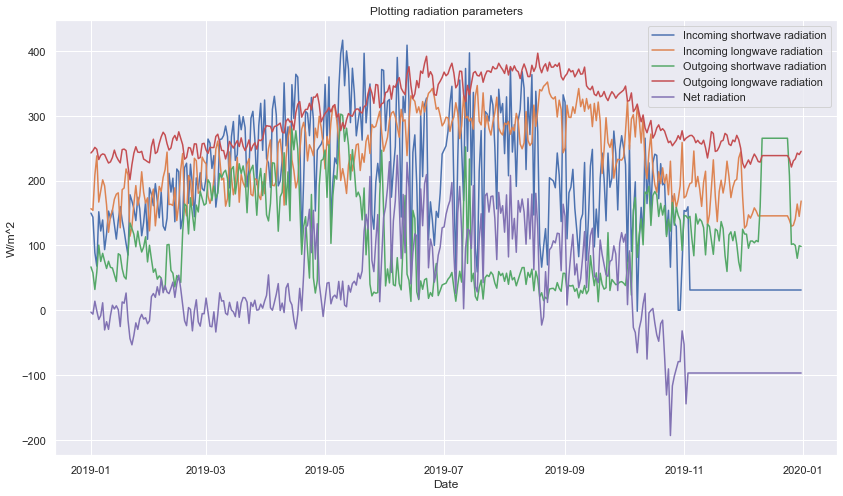

In [16]:
plt.figure(figsize=(14,8))
plt.title('Plotting radiation parameters')
plt.plot(data_AWS_syn['Incoming shortwave radiation (W/m^2)'],label='Incoming shortwave radiation')
plt.plot(data_AWS_syn['Incoming longwave radiation (W/m^2)'],label='Incoming longwave radiation')
plt.plot(data_AWS_syn['Outgoing shortwave radiation (W/m^2)'],label='Outgoing shortwave radiation')
plt.plot(data_AWS_syn['Outgoing longwave radiation (W/m^2)'],label='Outgoing longwave radiation')
plt.plot(data_AWS_syn['Net radiation (W/m^2)'],label='Net radiation')
plt.ylabel('W/m^2')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date')
plt.legend()
plt.grid(True)

In [17]:
data_AWS_syn['Net_radiation_calc'] = data_AWS_syn['Incoming shortwave radiation (W/m^2)'] - data_AWS_syn['Outgoing shortwave radiation (W/m^2)'] + data_AWS_syn['Incoming longwave radiation (W/m^2)'] - data_AWS_syn['Outgoing longwave radiation (W/m^2)']

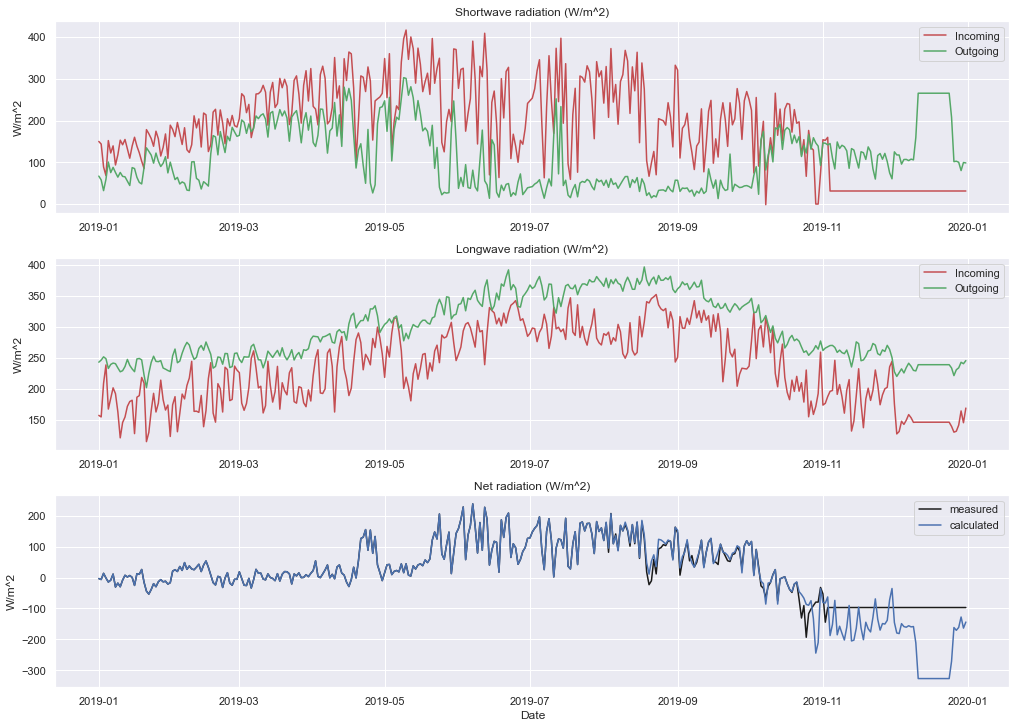

In [18]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])



f2_ax1.set_title('Shortwave radiation (W/m^2)')
f2_ax1.plot(data_AWS_syn['Incoming shortwave radiation (W/m^2)'],'r', label='Incoming')
f2_ax1.plot(data_AWS_syn['Outgoing shortwave radiation (W/m^2)'],'g', label='Outgoing')
f2_ax1.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Longwave radiation (W/m^2)')
f2_ax2.plot(data_AWS_syn['Incoming longwave radiation (W/m^2)'], 'r',label='Incoming')
f2_ax2.plot(data_AWS_syn['Outgoing longwave radiation (W/m^2)'], 'g',label='Outgoing')
f2_ax2.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
f2_ax2.legend()
f2_ax2.grid(True)

f2_ax3.set_title('Net radiation (W/m^2)')
f2_ax3.plot(data_AWS_syn['Net radiation (W/m^2)'], 'k', label='measured')
f2_ax3.plot(data_AWS_syn['Net_radiation_calc'], 'b', label='calculated')
f2_ax3.set_ylabel('W/m^2')
f2_ax3.set_xlabel('Date')
f2_ax3.legend()
f2_ax3.grid(True)


In [19]:
data_AWS_syn[['Incoming shortwave radiation (W/m^2)','Outgoing shortwave radiation (W/m^2)','Incoming longwave radiation (W/m^2)','Outgoing longwave radiation (W/m^2)','Net radiation (W/m^2)','Net_radiation_calc']].describe()

,Incoming shortwave radiation (W/m^2),Outgoing shortwave radiation (W/m^2),Incoming longwave radiation (W/m^2),Outgoing longwave radiation (W/m^2),Net radiation (W/m^2),Net_radiation_calc
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,189.000778,113.022665,234.581333,297.983998,27.244823,12.575448
std,104.503467,74.392006,60.705999,50.533518,86.745861,118.609594
min,-1.601000,13.028139,114.273611,201.541667,-193.412417,-327.270000
25%,113.537083,47.427625,182.120833,252.184028,-23.862368,-20.428931
50%,191.942292,100.305903,234.597917,288.897917,18.391528,19.120486
75%,269.203535,166.403340,290.018750,345.732639,88.944278,90.624708
max,416.853785,302.730625,352.248611,396.752083,239.133924,239.143278


### Erroneous data

In [20]:
data_AWS_syn['Incoming shortwave radiation (W/m^2)']['2019-11-03':].values

array([159.75409722,  31.23      ,  31.23      ,  31.23      ,
        31.23      ,  31.23      ,  31.23      ,  31.23      ,
        31.23      ,  31.23      ,  31.23      ,  31.23      ,
        31.23      ,  31.23      ,  31.23      ,  31.23      ,
        31.23      ,  31.23      ,  31.23      ,  31.23      ,
        31.23      ,  31.23      ,  31.23      ,  31.23      ,
        31.23      ,  31.23      ,  31.23      ,  31.23      ,
        31.23      ,  31.23      ,  31.23      ,  31.23      ,
        31.23      ,  31.23      ,  31.23      ,  31.23      ,
        31.23      ,  31.23      ,  31.23      ,  31.23      ,
        31.23      ,  31.23      ,  31.23      ,  31.23      ,
        31.23      ,  31.23      ,  31.23      ,  31.23      ,
        31.23      ,  31.23      ,  31.23      ,  31.23      ,
        31.23      ,  31.23      ,  31.23      ,  31.23      ,
        31.23      ,  31.23      ,  31.23      ])

Comments:
* The incoming shortwave radiation (W/m^2) has constant values from '2019-11-03' : '2019-12-31' - hence the dataset cannot be used! - Do we consider modelling the incoming shortwave radiation by back calculating it with outgoing shortwave radiation?
* Can outgoing radiation be greater than the incoming radiation? - I think it can, since heat can be stored and released at a later time?
* The values seems to be in general varying from [0 - 400 W/m^2] - That's okay!
* Most of the cases - Outgoing shortwave radiation < Incoming shortwave radiation - At time periods from 2019-10-01 it is false
* All time periods Outgoing longwave radiation > Incoming longwave radiation
* The measured and calculated net radiation values are mostly similar - Only at some time periods, they are not. The measured values cannot be considered from '2019-11-03' : '2019-12-31'
* The outgoing shortwave radiation [W/m^2] after '2019-12' - has a sudden increase - discard these values or find a replacement.

##### The best method is to replace time periods in which the data is missing/erroneous with previous year time periods! - Write an email for accessing the dataset [From a longer time sequence]

### Plotting Soil heat flux [W/m^2]

In [21]:
data_AWS_syn.columns

Index(['Wind speed at 10 m (m/s)', 'Wind direction at 10 m (°)',
       'Air temperature at 5 m (°C)', 'Relative humidity at 5 m (%)',
       'Precipitation at 10 m (mm)', 'Air pressure (hPa)',
       'Infrared temperature (°C)', 'Infrared temperature (°C)', 'PAR_down',
       'PAR_up', 'Incoming shortwave radiation (W/m^2)',
       'Outgoing shortwave radiation (W/m^2)',
       'Incoming longwave radiation (W/m^2)',
       'Outgoing longwave radiation (W/m^2)', 'Net radiation (W/m^2)',
       'Soil heat flux at - 0.06 m (W/m^2) - 1',
       'Soil heat flux at - 0.06 m (W/m^2) - 2',
       'Soil heat flux at - 0.06 m (W/m^2) - 3',
       'Soil moisture at - 0.04 m (%)', 'Soil moisture at - 0.1 m (%)',
       'Soil moisture at - 0.2 m (%)', 'Soil moisture at - 0.4 m (%)',
       'Soil moisture at - 0.8 m (%)', 'Soil moisture at - 1.2 m (%)',
       'Soil moisture at - 1.6 m (%)', 'Soil temperature at - 0.00 m (°C)',
       'Soil temperature at - 0.04 m (°C)', 'Soil temperature at - 0.1 

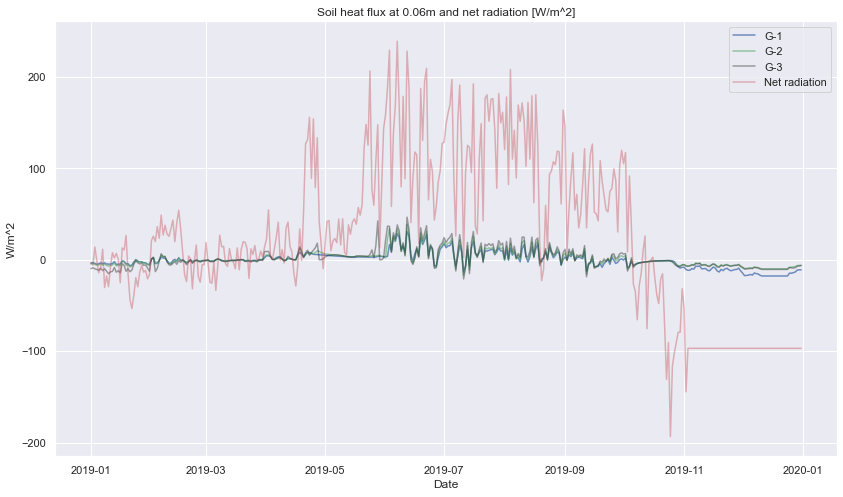

In [22]:
plt.figure(figsize=(14,8))
plt.title('Soil heat flux at 0.06m and net radiation [W/m^2]')
plt.plot(data_AWS_syn['Soil heat flux at - 0.06 m (W/m^2) - 1'],'b',alpha=0.8,label='G-1')
plt.plot(data_AWS_syn['Soil heat flux at - 0.06 m (W/m^2) - 2'],'g',alpha=0.6,label='G-2')
plt.plot(data_AWS_syn['Soil heat flux at - 0.06 m (W/m^2) - 3'],'k',alpha=0.4,label='G-3')
plt.plot(data_AWS_syn['Net radiation (W/m^2)'],'r',alpha=0.4,label='Net radiation')

plt.ylabel('W/m^2')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date')
plt.legend()
plt.grid(True)

In [23]:
data_AWS_syn[['Soil heat flux at - 0.06 m (W/m^2) - 1','Soil heat flux at - 0.06 m (W/m^2) - 2','Soil heat flux at - 0.06 m (W/m^2) - 3']].describe()

,Soil heat flux at - 0.06 m (W/m^2) - 1,Soil heat flux at - 0.06 m (W/m^2) - 2,Soil heat flux at - 0.06 m (W/m^2) - 3
count,365.000000,365.000000,365.000000
mean,-0.192266,1.409059,1.718489
std,8.804874,8.690349,11.045855
min,-17.760000,-16.814583,-21.002153
25%,-4.753632,-5.093979,-5.970917
50%,-0.543840,-0.469708,-0.765424
75%,3.777979,4.828528,5.798118
max,30.774931,38.554590,46.586292


Comments:

1. G-1, G-2 and G-3 sensors are all reading very similar sensor values.
    
2. The variations of net radiation seem to correspond to the variations of soil heat flux sensors.
    
3. Note that after 2019-10, the net radiation sensor is reading a very negative value - some error with the sensor?

### Plotting soil moisture at different depths 

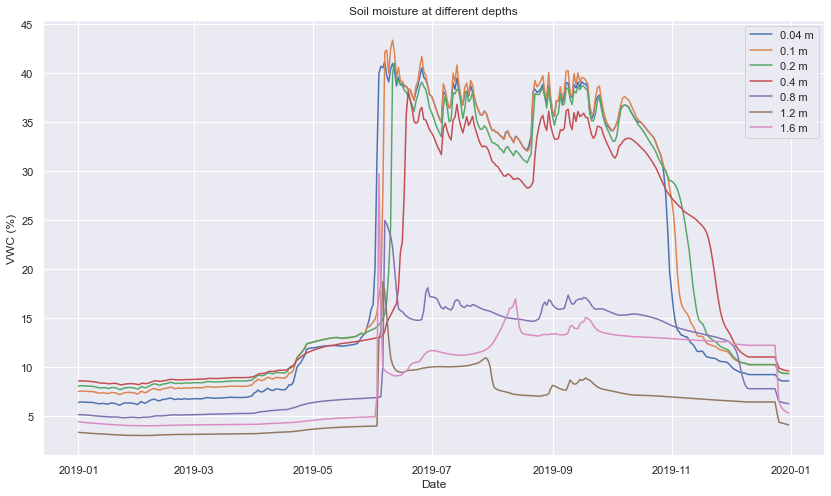

In [24]:
plt.figure(figsize=(14,8))
plt.title('Soil moisture at different depths')
plt.plot(data_AWS_syn['Soil moisture at - 0.04 m (%)'], label='0.04 m')
plt.plot(data_AWS_syn['Soil moisture at - 0.1 m (%)'], label='0.1 m')
plt.plot(data_AWS_syn['Soil moisture at - 0.2 m (%)'], label='0.2 m')
plt.plot(data_AWS_syn['Soil moisture at - 0.4 m (%)'], label='0.4 m')
plt.plot(data_AWS_syn['Soil moisture at - 0.8 m (%)'], label='0.8 m')
plt.plot(data_AWS_syn['Soil moisture at - 1.2 m (%)'], label='1.2 m')
plt.plot(data_AWS_syn['Soil moisture at - 1.6 m (%)'], label='1.6 m')


plt.ylabel('VWC (%)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date')
plt.legend()
plt.grid(True)

Comments:
1. Soil moisture decreases with depth - Good!
2. Soil moisture sensors at 0.04 m, 0.1 m, 0.2 m & 0.4 m have similar moisture contents [during the monsoon period] and also higher soil moisture content than at 0.8 m, 1.2 m and 1.6 m. 
3. There seems to be a grouping of soil moisture sensors at 0.04 m, 0.1 m, 0.2 m & 0.4 m  & 0.8 m, 1.2 m and 1.6 m - There probably exist two different layers of soil? - Similar pattern seen at up-slope, middle-slope and riparian zone.
4. Soil moisture content increases during the indian summer monsoons [2019-06 to 2019-11] - Plot it with precipitation?
5. How to identify if soil is frozen? - Seems to be a constant moisture content during the winter period.

In [25]:
data_AWS_syn.columns

Index(['Wind speed at 10 m (m/s)', 'Wind direction at 10 m (°)',
       'Air temperature at 5 m (°C)', 'Relative humidity at 5 m (%)',
       'Precipitation at 10 m (mm)', 'Air pressure (hPa)',
       'Infrared temperature (°C)', 'Infrared temperature (°C)', 'PAR_down',
       'PAR_up', 'Incoming shortwave radiation (W/m^2)',
       'Outgoing shortwave radiation (W/m^2)',
       'Incoming longwave radiation (W/m^2)',
       'Outgoing longwave radiation (W/m^2)', 'Net radiation (W/m^2)',
       'Soil heat flux at - 0.06 m (W/m^2) - 1',
       'Soil heat flux at - 0.06 m (W/m^2) - 2',
       'Soil heat flux at - 0.06 m (W/m^2) - 3',
       'Soil moisture at - 0.04 m (%)', 'Soil moisture at - 0.1 m (%)',
       'Soil moisture at - 0.2 m (%)', 'Soil moisture at - 0.4 m (%)',
       'Soil moisture at - 0.8 m (%)', 'Soil moisture at - 1.2 m (%)',
       'Soil moisture at - 1.6 m (%)', 'Soil temperature at - 0.00 m (°C)',
       'Soil temperature at - 0.04 m (°C)', 'Soil temperature at - 0.1 

### Plotting soil temperature at different depths

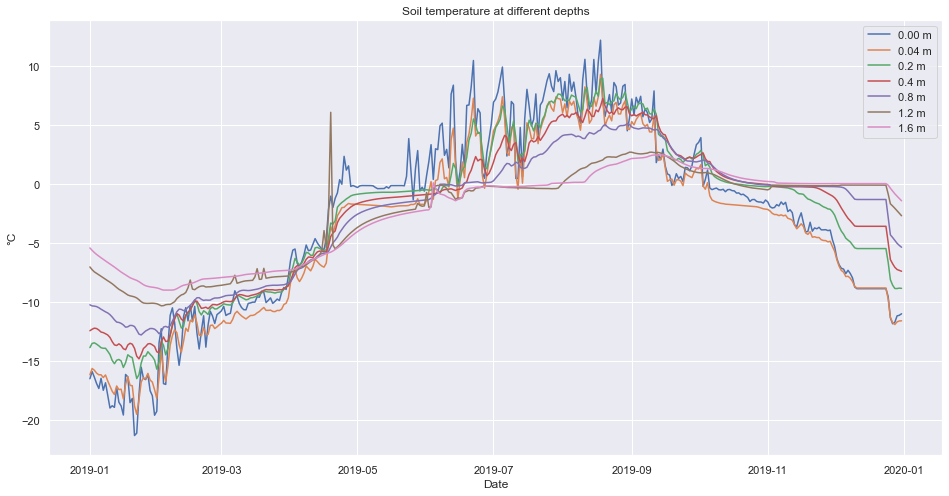

In [26]:
plt.figure(figsize=(16,8))
plt.title('Soil temperature at different depths')
#plt.plot(data_AWS_syn['Air temperature at 5 m (°C)'], label='Air temperature at 5 m')
plt.plot(data_AWS_syn['Soil temperature at - 0.00 m (°C)'], label='0.00 m')
plt.plot(data_AWS_syn['Soil temperature at - 0.04 m (°C)'], label='0.04 m')
plt.plot(data_AWS_syn['Soil temperature at - 0.2 m (°C)'], label='0.2 m')
plt.plot(data_AWS_syn['Soil temperature at - 0.4 m (°C)'], label='0.4 m')
plt.plot(data_AWS_syn['Soil temperature at - 0.8 m (°C)'], label='0.8 m')
plt.plot(data_AWS_syn['Soil temperature at - 1.2 m (°C)'], label='1.2 m')
plt.plot(data_AWS_syn['Soil temperature at - 1.6 m (°C)'], label='1.6 m')
plt.ylabel('°C')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('°Cm-°Cd'))
plt.xlabel('Date')
plt.legend()
plt.grid(True)

Comments:
1. In the winter the surface is cooler than the subsurface (soil at greater depths) & in the summer, the subsurface is cooler than the surface - Good! 
2. The air temperature increases during the summer and decreases during the winter good!
3. The variations of subsurface temperature decreases with depth.

### Plotting parameters together:

Text(0, 0.5, '(mm)')

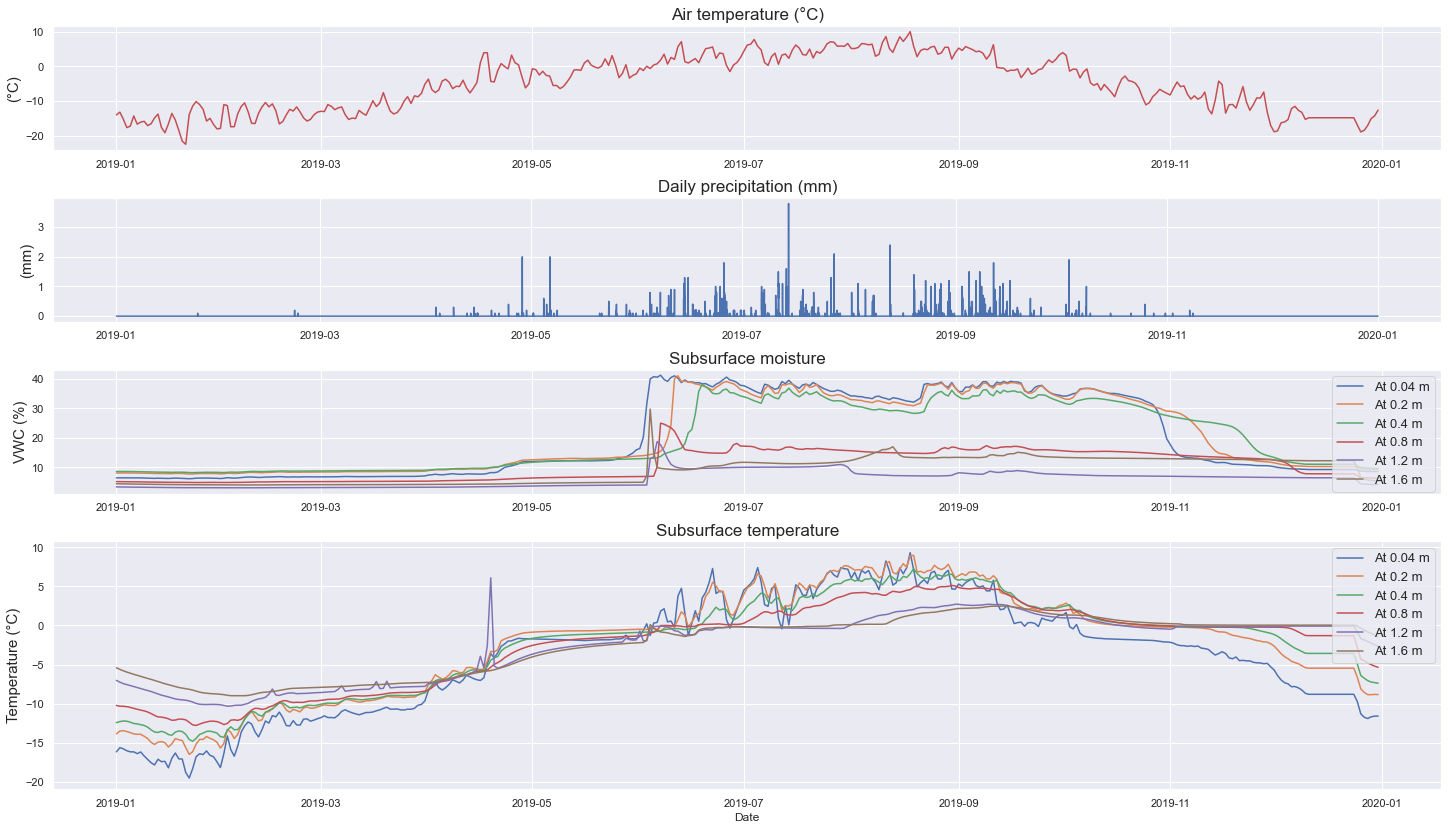

In [27]:
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, height_ratios=[1,1,1,2,2], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[2, 0])
f2_ax2 = fig2.add_subplot(spec2[3, 0])
f2_ax3 = fig2.add_subplot(spec2[0, 0])
f2_ax4 = fig2.add_subplot(spec2[1, 0])

#plt.title('Soil moisture data - Mean hourly values (linearly interpolated for missing values)')

f2_ax1.set_title('Subsurface moisture',fontsize=17)
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.04 m (%)'], label='At 0.04 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.2 m (%)'], label='At 0.2 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.4 m (%)'], label='At 0.4 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.8 m (%)'], label='At 0.8 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 1.2 m (%)'], label='At 1.2 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 1.6 m (%)'], label='At 1.6 m')
f2_ax1.set_ylabel('VWC (%)',fontsize=15)
#f2_ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#f2_ax1.xlabel('Date')
f2_ax1.legend(loc=1,fontsize=13)
f2_ax1.grid(True)

f2_ax2.set_title('Subsurface temperature',fontsize=17)
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.04 m (°C)'], label='At 0.04 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.2 m (°C)'], label='At 0.2 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.4 m (°C)'], label='At 0.4 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.8 m (°C)'], label='At 0.8 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 1.2 m (°C)'], label='At 1.2 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 1.6 m (°C)'], label='At 1.6 m')
f2_ax2.set_ylabel('Temperature (°C)',fontsize=15)
#f2_ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
f2_ax2.set_xlabel('Date')
f2_ax2.legend(loc=1,fontsize=13)
f2_ax2.grid(True)

f2_ax3.set_title('Air temperature (°C)',fontsize=17)
f2_ax3.plot(data_AWS_syn['Air temperature at 5 m (°C)'],'r')
f2_ax3.set_ylabel('(°C)',fontsize=15)



f2_ax4.set_title('Daily precipitation (mm)',fontsize=17)
f2_ax4.plot(data_AWS_prep['Precipitation at 10 m (mm)'])
f2_ax4.set_ylabel('(mm)',fontsize=15)


#plt.savefig('met_data.png',dpi=300,bbox_inches='tight')